In [1]:
import tensorflow as tf

### tensorflow 버전확인
print(tf.__version__)

2.16.1


### tensorflow는 두 번째 가상환경에 설치했음
### 주피터 노트북을 키고 가상환경이 켜진 상태에서 실행가능함

In [5]:
### graph 속 node생성 node의 값은 Hello, tensorflow임
hello = tf.constant("Hello, Tensoflow!")

### TensorFlow 1.x는 session 필요 computational graph 출력 시 session 만들어야 가능
# sess = tf.Session()
# print(sess.run(hello))


### TensorFlow 2.x는 session 없이 바로 출력 가능
print(hello.numpy())

# byte string : b'Hello, Tensoflow!'



b'Hello, Tensoflow!'


### 강의는 tensorflow 1.x임 tensorflow 2.x부터는 session 만들지 않음
```python
hello = tf.constant("Hello, Tensorflow!")

print(hello.numpy())
```

In [6]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

print("node1 : ", node1, "node2 : ", node2)
print("node3 : ", node3)

print([node1.numpy(), node2.numpy()]) ## node1 출력, node2 출력
print(node3.numpy()) ## + tensor 출력

# Build graph using tensorflow operations
# feed data and run graph(걍 numpy())
# update variables in the graph



node1 :  tf.Tensor(3.0, shape=(), dtype=float32) node2 :  tf.Tensor(4.0, shape=(), dtype=float32)
node3 :  tf.Tensor(7.0, shape=(), dtype=float32)
[3.0, 4.0]
7.0


### 노드 생성
```python
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)
```
### 두개의 노드값을 더해서 새로운 노드 만들기
```python
node3 = tf.add(node1, node2)
```

### 출력하기
```python
print(node3.numpy())
```


In [7]:
# a = tf.placeholder(tf.float32)
# b = tf.placeholder(tf.float32)

# adder_node = a + b
# sess = tf.Session()
# print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))

a = tf.constant(3.0)
b = tf.constant(4.5)

@tf.function
def add_tensors(x, y):
   return x + y

result = add_tensors(a, b)
print(result)

tf.Tensor(7.5, shape=(), dtype=float32)


### placeholder node(constant랑 다른거임) 이 역시 1.x 문법임
값이 정해져 있지 않은 상태에서 호출시에 값을 넘겨서 노드값 출력함

### 2.x 문법에서의 placeholder
```python
import tensorflow as tf

# 두 개의 인수를 더하는 함수를 정의합니다.
def add(a, b):
    return a + b

# 함수를 호출하고 결과를 출력합니다.
result = add(3.0, 4.5)
print(result)

```

### python의 데코레이터를 이용하여 텐서 객체 더하기
```python
import tensorflow as tf

# 두 개의 입력 텐서를 정의합니다.
a = tf.constant(3.0)
b = tf.constant(4.5)

# 더하기 연산을 정의합니다.
@tf.function
def add_tensors(x, y):
    return x + y

# 함수 실행 및 결과 출력
result = add_tensors(a, b)
print(result)

```

### tensor
걍 array라고 생각하자

### Rank
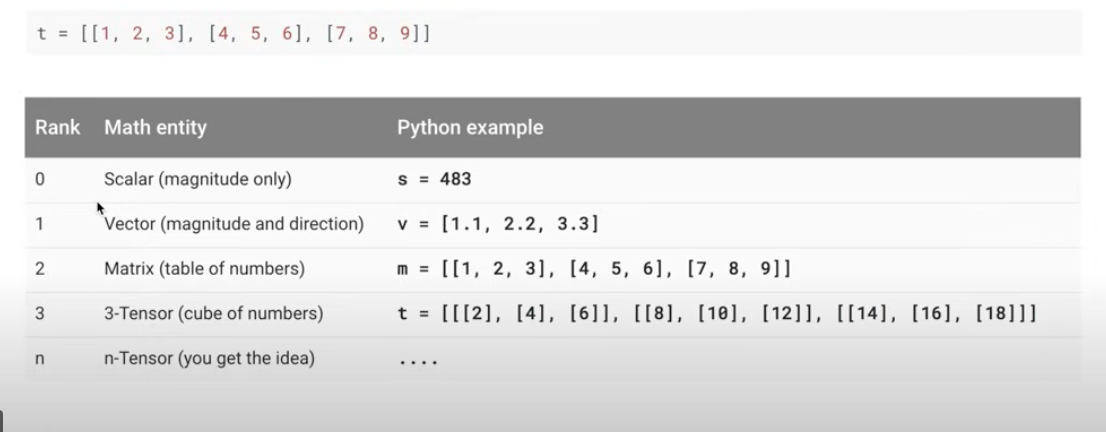

### shape
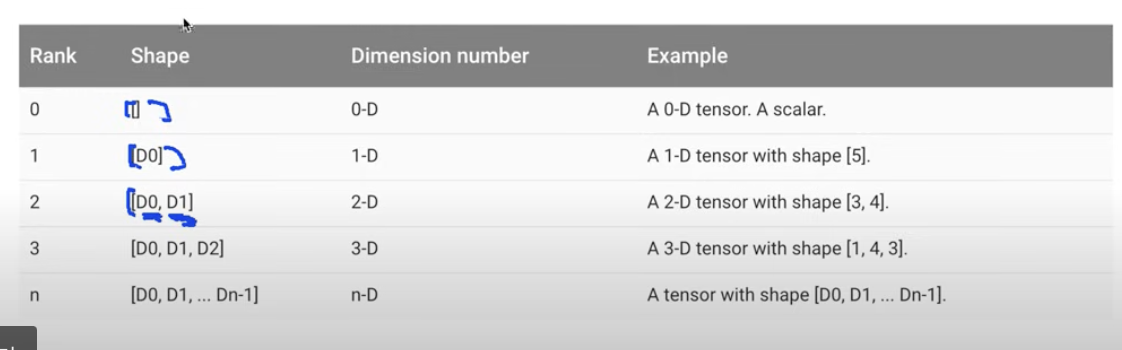

```
t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] -> [3, 3]
```
뒤에 3은 3개의 요소를 갖고 있음을 의미 앞에 3은 그 3개의 요소를 갖고있는 요소들이 3개라는 의미

### type
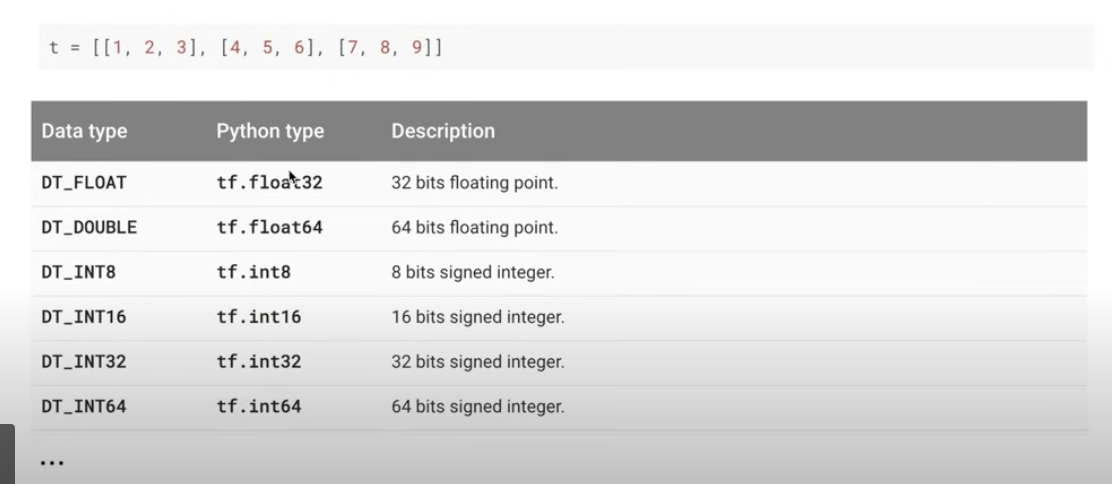

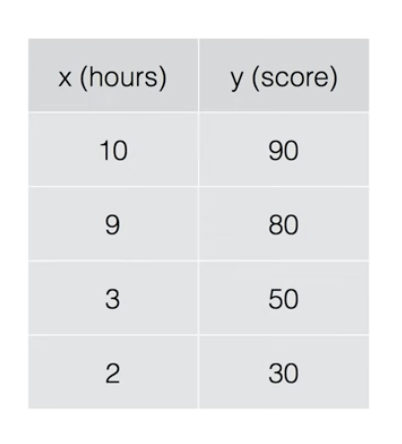
1. 다음 데이터로 supervised learning 한다고 하자 범위가 많으니 regression(model)이라고 함
2. trainig후 model 생성
3. 원하는 x값에 해당하는 y값을 얻음(regression이 예측을 해줌)

#### linear Regression은 linear로 설명가능한 현상에 대해서 학습하여 질문에 대해 원하는 대답을 얻음

(Linear) Hypothesis
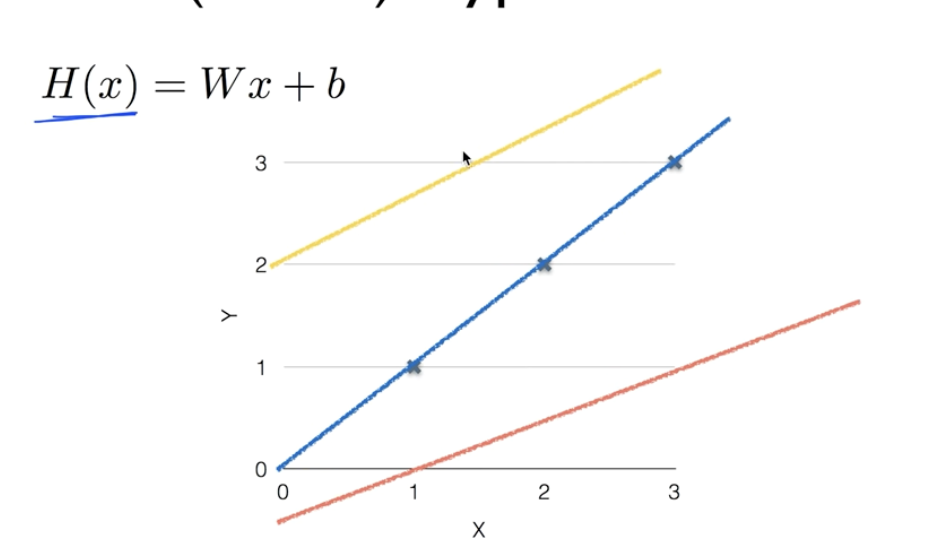
선을 찾는 것이 linear hypothesis라고 함

### Cost function
우리가 세운 hypothsis과 실제 데이터가 얼마나 다른가를 구함
보통 차이를 제곱해서 차이가 크면 패널티를 더 주는 방법을 사용함
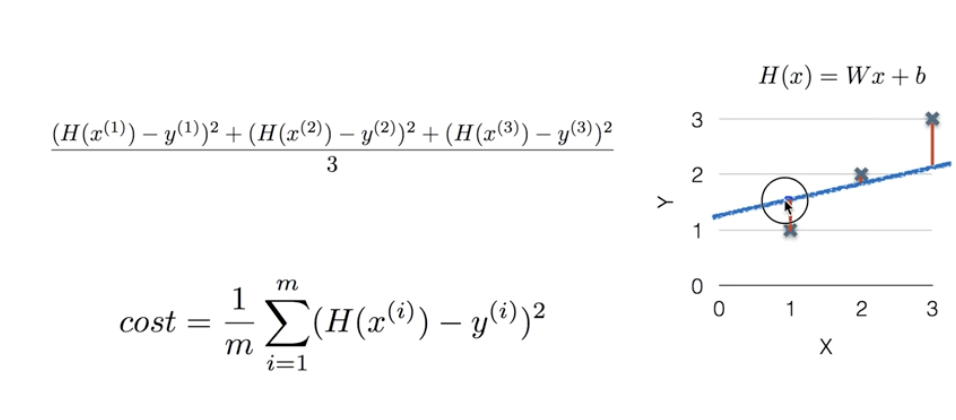

이때 H함수는 linear라고 알고있으며 대입하면 다음과 같다.
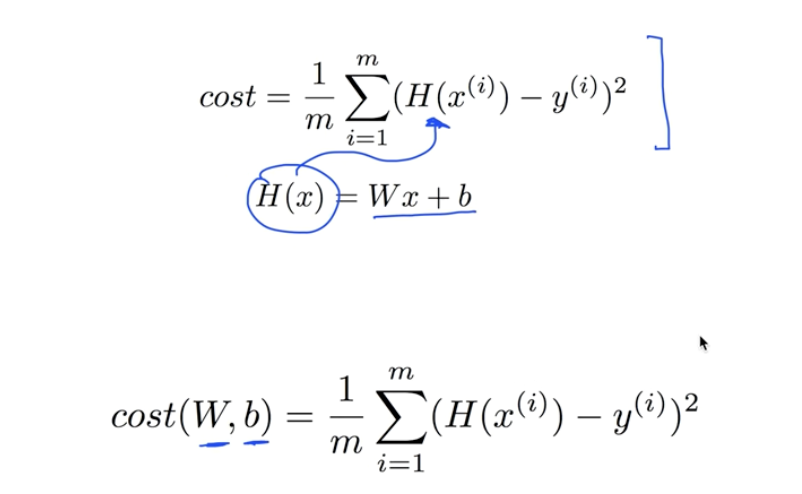

cost function은 W와 b에 관한 함수가 된다.
따라서 W와 b에 의해 변하는 cost function을 최소화하는 것이 학습이라고 할 수 있다.


In [8]:
import tensorflow as tf

# 훈련 데이터를 정의합니다.
x_train = [1.0, 2.0, 3.0]
y_train = [1.0, 2.0, 3.0]

# 가중치와 편향 변수를 정의합니다.
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 가설을 정의하는 함수
def hypothesis(x):
    return x * W + b

# 비용 함수를 정의합니다.
def cost_fn(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

# 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 훈련 과정을 정의합니다.
def train_step():
    with tf.GradientTape() as tape:
        cost = cost_fn(x_train, y_train)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return cost

# 훈련을 실행합니다.
for step in range(2001):
    cost = train_step()
    if step % 20 == 0:
        print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}, b: {b.numpy()}")


Step: 0, Cost: 0.5614026188850403, W: [0.15933734], b: [1.4738541]
Step: 20, Cost: 0.3143688440322876, W: [0.33706084], b: [1.4653895]
Step: 40, Cost: 0.28374215960502625, W: [0.38137734], b: [1.402311]
Step: 60, Cost: 0.2576830983161926, W: [0.4117035], b: [1.3369588]
Step: 80, Cost: 0.2340318113565445, W: [0.43947056], b: [1.2741792]
Step: 100, Cost: 0.21255148947238922, W: [0.46582475], b: [1.2143025]
Step: 120, Cost: 0.19304265081882477, W: [0.4909301], b: [1.1572351]
Step: 140, Cost: 0.1753244549036026, W: [0.51485455], b: [1.1028496]
Step: 160, Cost: 0.15923236310482025, W: [0.5376547], b: [1.0510194]
Step: 180, Cost: 0.14461742341518402, W: [0.5593832], b: [1.0016254]
Step: 200, Cost: 0.13134387135505676, W: [0.5800905], b: [0.95455277]
Step: 220, Cost: 0.11928866058588028, W: [0.59982467], b: [0.9096925]
Step: 240, Cost: 0.10833986848592758, W: [0.6186315], b: [0.8669403]
Step: 260, Cost: 0.09839601069688797, W: [0.63655436], b: [0.8261973]
Step: 280, Cost: 0.08936480432748795,

### 과정

1. 훈련데이터 정의하기

    ```python
    x_train = [1.0, 2.0, 3.0]
    y_train = [1.0, 2.0, 3.0]
    ```
2. $W$와 $b$값을 랜덤으로 정의함

    ```python
    W = tf.Variable(tf.random.normal([1]), name='weight')
    b = tf.Variable(tf.random.normal([1]), name='bias')
    ```

3. $H(x)$ 정의하기

    ```python
    def hypothesis(x):
        return x * W + b
    ```

4. $cost(W, b)$ 정의하기
   
    ```python
    def cost_fn(x, y):
        return tf.reduce_mean(tf.square(hypothesis(x) - y))
    ```
5. optimizer 정의하기

    ```python
    optimizer = tf.optimizers.SGD(learning_rate=0.01)
    ```

6. trainning 정의(이 부분은 아직 모름)
   
    ```python
    def train_step():
        with tf.GradientTape() as tape:
            cost = cost_fn(x_train, y_train)
        gradients = tape.gradient(cost, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))
        return cost
    ```

7. 훈련진행

    ```python
    for step in range(2001):
        cost = train_step()
        if step % 20 == 0:
            print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}, b: {b.numpy()}")
    ```


### Variable
기존의 변수와는 다른 개념이며 텐서플로우가 사용하는 변수이다.
텐서플로우가 자체적으로 변경하는 값이다. trainable variable이다.


$H(x)=Wx+b$에서 $W$와 $b$값을 모르므로 $random$한 값을 이용한다.

```python
W = tf.Variable(tf.random_normal([1]), name='weight')
```

### cost function
$cost(W, b) = \frac{1}{m}\displaystyle\sum_{i=0}^{m}{(H(x^{(i)})-y^{(i)})^2}$

### reduce_mean은 텐서의 평균을 내주는 함수이다.



다음은 강의내용에서 나온 코드이다. 1.x버전코드이다.
```python

### Linear Regression

x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([2]), name='bias')

hypothsis = x_train * W + b;
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optmizer.minimize(cost) ### code minimize하기

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001): ### 출력하기
   sess.run(train)
   if step % 20 == 0:
      print(step, sess.run(W), sess.run(b))
```

In [9]:
import tensorflow as tf

# 훈련 데이터를 정의합니다.
x_train = [1.0, 2.0, 3.0]
y_train = [1.0, 2.0, 3.0]

# 가중치와 편향 변수를 정의합니다.
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 가설을 정의하는 함수
def hypothesis(x):
    return x * W + b

# 비용 함수를 정의합니다.
def cost_fn(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

# 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 훈련 과정을 정의합니다.
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        cost = cost_fn(x, y)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return cost

# 세션 대신 직접 값을 전달하여 훈련을 실행합니다.
for step in range(2001):
    cost = train_step(x_train, y_train)
    if step % 20 == 0:
        print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}, b: {b.numpy()}")


Step: 0, Cost: 2.051090955734253, W: [0.36843398], b: [0.09767839]
Step: 20, Cost: 0.03142644092440605, W: [0.8211431], b: [0.27917853]
Step: 40, Cost: 0.011937152594327927, W: [0.8698292], b: [0.28377753]
Step: 60, Cost: 0.010690954513847828, W: [0.8797821], b: [0.27212822]
Step: 80, Cost: 0.009708334691822529, W: [0.8857972], b: [0.2594999]
Step: 100, Cost: 0.008817248977720737, W: [0.89119905], b: [0.2473197]
Step: 120, Cost: 0.008007974363863468, W: [0.8963156], b: [0.23569804]
Step: 140, Cost: 0.007272971328347921, W: [0.90118873], b: [0.22462128]
Step: 160, Cost: 0.006605427246540785, W: [0.90583247], b: [0.21406491]
Step: 180, Cost: 0.005999153014272451, W: [0.91025805], b: [0.20400462]
Step: 200, Cost: 0.005448526237159967, W: [0.91447556], b: [0.19441713]
Step: 220, Cost: 0.004948444198817015, W: [0.9184948], b: [0.1852803]
Step: 240, Cost: 0.0044942558743059635, W: [0.9223253], b: [0.17657281]
Step: 260, Cost: 0.0040817540138959885, W: [0.9259758], b: [0.16827452]
Step: 280, 

In [1]:
import tensorflow as tf

# TensorFlow가 GPU를 인식하고 있는지 확인합니다.
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


### GPU가속 여부 확인
```python
import tensorflow as tf

# TensorFlow가 GPU를 인식하고 있는지 확인합니다.
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

```


# GPU를 인식하지 못하는 문제를 해결하기 위해서 했던 일들
1. .zshrc 파일 수정
   .zshrc 파일의 내부 설정들이 너무 많아 불필요한 설정을 제거하였다. 예를 들어 

   ```python
   alias python='/opt/homebrew/bin/python3'
   alias python='/Users/khj/jupyter/.venv/bin/python'
   ```

   위의 내용들을 제거해주었다.

2. 제거한 뒤에 

   ```python
   # Conda 초기화
   eval "$(/opt/anaconda3/bin/conda shell.zsh hook)"
   ```


Conda 초기화 설정을 해주었다.

1. source ~/.zshrc를 통해 변경 사항을 적용한다.

2. Conda 환경 활성화 및 확인

   ```python
   conda activate deep
   which python
   python --version
   ```

   위의 명령을 통해 현재 activate 된 가상환경이 deep인지를 확인하며 가상환경의 경로를 확인하고 현재 가상환경에 설치된 파이썬의 버전을 확인한다.


   #### 위의 과정에서 activate된 가상환경이 deep이 되는 것이 확인되야한다.
   #### 위의 과정에서 현재 가상환경의 경로가 제대로 되어있는지 확인되야한다.
   #### 위의 과정에서 가상환경의 파이썬의 버전이 3.10x버전인지 확인해야한다.

   현재 애플 실리콘에서 3.12x버전에서 GPU가속이 안된다고 하며, 이를 해결하기 위해 3.10x버전으로 낮춰서 사용한다.

5. 가상환경에서 Tensorflow설치하기

   ```python
   conda activate deep
   pip install tensorflow
   pip install tensorflow-macos
   pip install tensorflow-metal
   ```
   
   3.12x버전인 경우 tensorflow-metal, tensorflow-macos 중 하나가 설치가 안된다.

6. tensorflow-metal 확인
   ```python
   import tensorflow as tf
   print("TensorFlow version:", tf.__version__)

   # TensorFlow가 GPU를 인식하고 있는지 확인합니다.
   physical_devices = tf.config.experimental.list_physical_devices('GPU')
   print("Num GPUs Available: ", len(physical_devices))

   if physical_devices:
      try:
         # 메모리 증가를 설정합니다.
         for device in physical_devices:
               tf.config.experimental.set_memory_growth(device, True)
      except RuntimeError as e:
         # 메모리 증가 설정은 프로그램이 시작되기 전에 설정해야 합니다.
         print(e)

   print("Is TensorFlow using a GPU?", tf.test.is_gpu_available())

   ```
   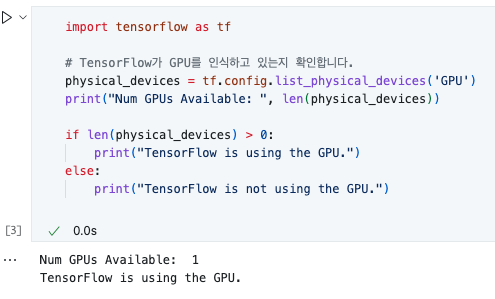

In [1]:
import tensorflow as tf
import time

# GPU 설정 (필요한 경우)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU available, using CPU.")


# 훈련 데이터를 정의합니다.
x_train = [1.0, 2.0, 3.0]
y_train = [1.0, 2.0, 3.0]

# 가중치와 편향 변수를 정의합니다.
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 가설을 정의하는 함수
def hypothesis(x):
    return x * W + b

# 비용 함수를 정의합니다.
def cost_fn(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

# 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 훈련 과정을 정의합니다.
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        cost = cost_fn(x, y)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return cost

# 훈련을 실행하고 시간 측정
start_time = time.time()
for step in range(20001):
    cost = train_step(x_train, y_train)
    if step % 20 == 0:
        print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}, b: {b.numpy()}")
end_time = time.time()

print(f"Training time: {end_time - start_time} seconds")


1 Physical GPUs, 1 Logical GPUs


2024-06-24 17:07:26.861688: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-06-24 17:07:26.861712: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-24 17:07:26.861716: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-24 17:07:26.862011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-24 17:07:26.862025: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-24 17:07:27.050043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Step: 0, Cost: 24.494277954101562, W: [-0.48558605], b: [-1.2593968]
Step: 20, Cost: 0.25548410415649414, W: [1.0501], b: [-0.55537146]
Step: 40, Cost: 0.032652273774147034, W: [1.1873244], b: [-0.46787003]
Step: 60, Cost: 0.027847571298480034, W: [1.1918114], b: [-0.44003528]
Step: 80, Cost: 0.025275230407714844, W: [1.1840625], b: [-0.41879857]
Step: 100, Cost: 0.022955209016799927, W: [1.1755327], b: [-0.39906353]
Step: 120, Cost: 0.020848294720053673, W: [1.167295], b: [-0.380304]
Step: 140, Cost: 0.01893474906682968, W: [1.1594336], b: [-0.36243054]
Step: 160, Cost: 0.01719682663679123, W: [1.151941], b: [-0.3453975]
Step: 180, Cost: 0.015618430450558662, W: [1.1448003], b: [-0.32916504]
Step: 200, Cost: 0.014184913598001003, W: [1.1379951], b: [-0.31369546]
Step: 220, Cost: 0.012882946990430355, W: [1.1315099], b: [-0.2989529]
Step: 240, Cost: 0.011700503528118134, W: [1.1253294], b: [-0.2849032]
Step: 260, Cost: 0.010626599192619324, W: [1.1194395], b: [-0.27151385]
Step: 280, C

In [3]:
import tensorflow as tf

# TensorFlow가 GPU를 인식하고 있는지 확인합니다.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

if len(physical_devices) > 0:
    print("TensorFlow is using the GPU.")
else:
    print("TensorFlow is not using the GPU.")


Num GPUs Available:  1
TensorFlow is using the GPU.


$H(x)=Wx+b$에서 $W$와 $b$값을 모르므로 $random$한 값을 이용한다.

$cost(W, b) = \frac{1}{m}\displaystyle\sum_{i=0}^{m}{(H(x^{(i)})-y^{(i)})^2}$

cost를 최소화 하는 $W$, $b$결정이 목표


만약 b가 0이라면

$H(x)=Wx$ 이고
$cost(W, b) = \frac{1}{m}\displaystyle\sum_{i=0}^{m}{(Wx^{(i)}-y^{(i)})^2}$ 이다


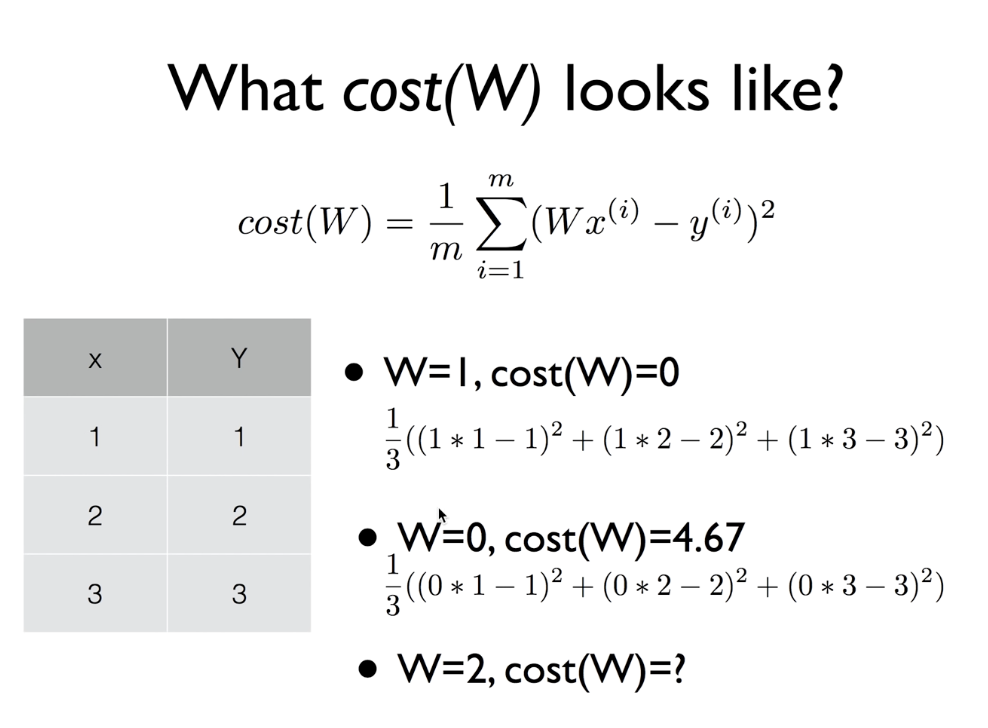

$W$는 우리가 구하기 위해서 달려가는 목표임 당연히 cost값이 처음엔 큰게 당연함

### Cost function의 그래프 개형은?

$W$가 x축이라고 하고 training data가
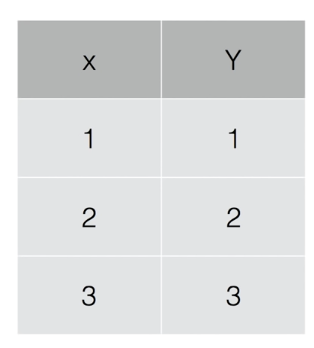라 하면

$cost(W) = \frac{(W - 1)^2 + (2W - 2)^2 + (3W - 3)^2}{m}$
으로 계산했다. 따라서 이차함수 개형일 듯 하다

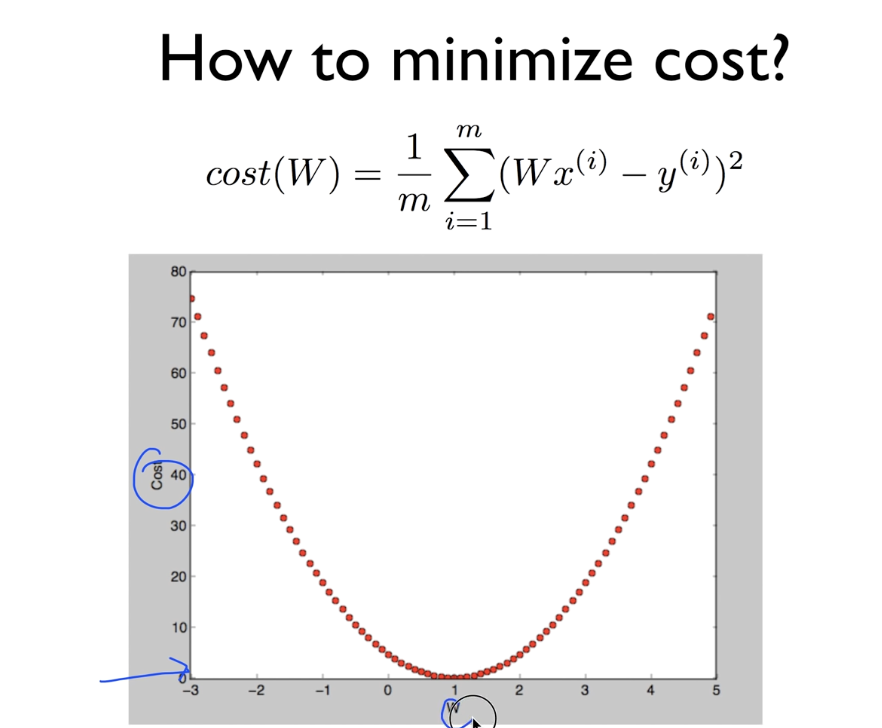
위 cost function에서 W를 찾는 것이다

### Gradient descent algorithm

경사를 따라 내려가는 알고리즘이다. 주어진 cost function을 minimize하는 알고리즘이다.

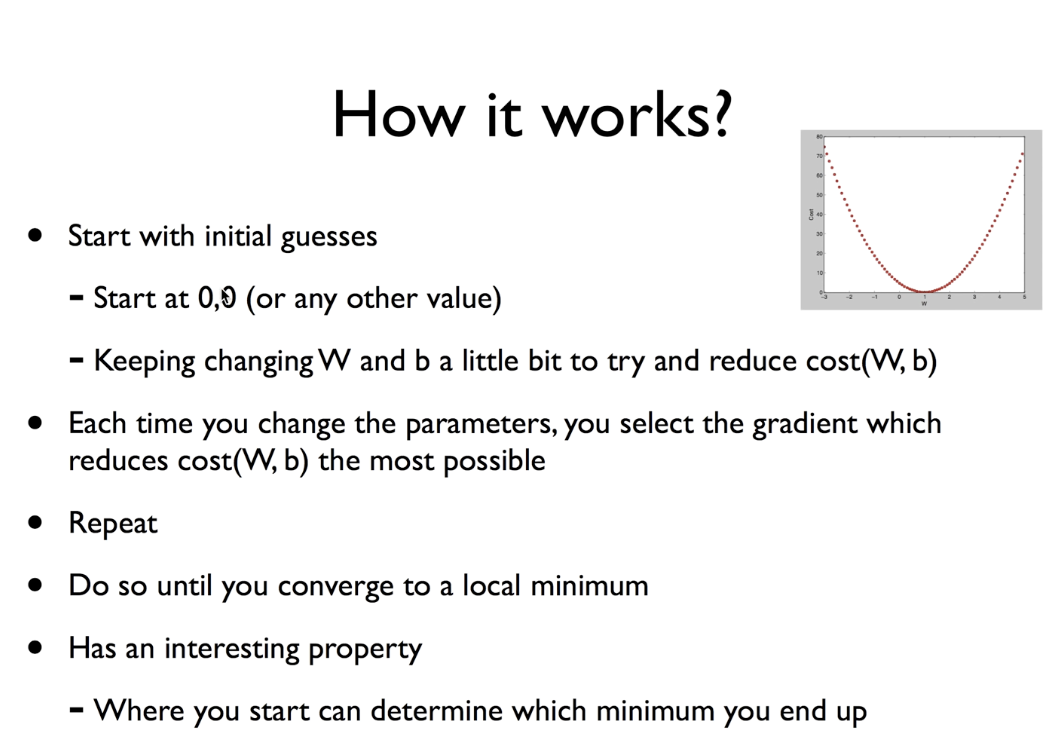

- 아무 점에서 시작 가능하다.
- W를 경사도에 따라서 감소시킨다.
  

$cost(W, b) = \frac{1}{2m}\displaystyle\sum_{i=0}^{m}{(Wx^{(i)}-y^{(i)})^2}$ 을 미분하면

$W := W - \alpha\frac{\partial}{\partial W}cost(W)$

$W := W - \alpha\frac{\partial}{\partial W}\frac{1}{2m}\displaystyle\sum_{i=0}^{m}{(Wx^{(i)}-y^{(i)})^2}$

$W := W - \alpha\frac{\partial}{\partial W}\frac{1}{2m}\displaystyle\sum_{i=0}^{m}{2(Wx^{(i)}-y^{(i)})x^{(i)}}$

$W := W - \alpha\frac{\partial}{\partial W}\frac{1}{m}\displaystyle\sum_{i=0}^{m}{(Wx^{(i)}-y^{(i)})x^{(i)}}$

만약 기울기가 음수라면 $W := W_{q} > 0$ 이는 minimize하기 위해 $W$를 증가시킨다는 것이다.

$\alpha$는 learning lat?? 이라고 하며 상수라고 한다고 함

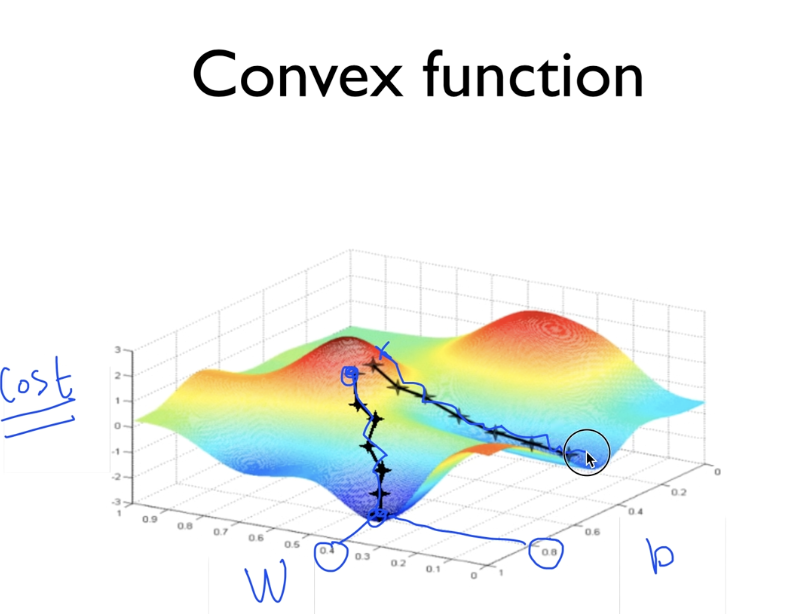
경사도는 시작 위치에 따라 달라질 수 있음

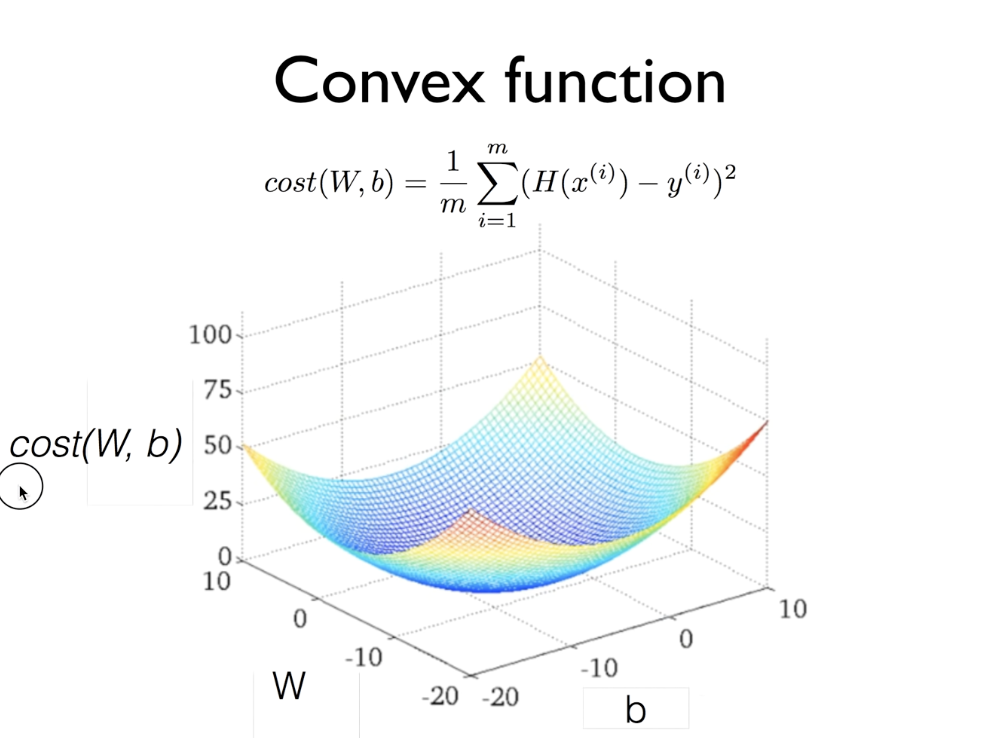

우리의 cost function과 hypothesis로 그림을 그리면 Convex function 형태가 나오며
어느 점에서 시작하든 $W$와 $b$가 같음. 따라서 cost function 이 Convex function형태면 Gradient descent algorithm을 
사용할 수 있다.

